In [1]:
import random as rd

Variant = 20
rd.seed(Variant)

list_struct = ["Очередь", "Массив"]
get_memory = ["Куча", "Анонимное отображение"]
list_func_array = ["Создание массива заданного размера","Заполнение случайными числами", "Нахождение суммы элементов массива", "Подсчет количества четных чисел",
                   "Получение списка нечетных чисел", "Подсчет количества простых чисел", "Реверсирование элементов массива"]
list_func_quiuing = ["Добавление в конец","Удаление из начала", "Заполнение случайными числами",
                     "Подсчет количества четных чисел", "Получение списка нечетных чисел", "Подсчет количества простых чисел",
                    "Подсчет количества чисел, оканчивающихся на 1",
                     "Удаление всех четных чисел (прочитанное нечетное число добавляется обратно в конец)"]

name_struct = rd.sample(list_struct,1)
name_get_memory = rd.sample(get_memory,1)
if name_struct == ["Очередь"]:
    list_action =[list_func_quiuing[0], list_func_quiuing[1], list_func_quiuing[2]]+rd.sample(list_func_quiuing[3:],3)
if name_struct == ["Массив"]:
    list_action =[list_func_quiuing[0], list_func_quiuing[1]]+rd.sample(list_func_quiuing[2:],3)
print("Структура: ", name_struct)
print("Метод выделения памяти: ", name_get_memory)
print("Список функций (действий): ", list_action);

Структура:  ['Очередь']
Метод выделения памяти:  ['Анонимное отображение']
Список функций (действий):  ['Добавление в конец', 'Удаление из начала', 'Заполнение случайными числами', 'Подсчет количества четных чисел', 'Подсчет количества простых чисел', 'Подсчет количества чисел, оканчивающихся на 1']


# test.c



```
#include "stdio.h"


long * create_queue();

void delete_queue();

void mypush(long num);

long mypop();

void fill_random(long size);

long count_even();

long count_simple();

long count_1_ended();


int main(){
    long * myq = create_queue();

    fill_random(10);
    long el = 999;
    for (; el < 1004; el++) mypush(el);

    long even = count_even(), simple = count_simple(), end_with_1 = count_1_ended();
    printf("четных: %ld, простых: %ld, оканчиваются на 1: %ld\n", even, simple, end_with_1);
    
    for (int i = 0; i < 15; i++){
        el = mypop();
        printf("%ld\n", el);
    }

    delete_queue(myq);
    return 0;    
}
```



# myqueue.asm



```
format ELF64


public create_queue
public delete_queue
public mypush
public mypop
public fill_random
public count_even
public count_simple
public count_1_ended

MAXSIZE = 1000


section '.bss' writable
    head rq 1   ;начало очереди
    tail rq 1   ;конец очереди
    minaddr rq 1    ;начало выделенной области
    maxaddr rq 1    ;конец выделенной области
    size rq 1   ;длина очереди
    place rb 1

    f db "/dev/random", 0

section '.text' executable

; создает пустую очередь
create_queue:
    mov rax, 9
    mov rdi, 0      ;начальный адрес выберет сама ОС
	mov rsi, MAXSIZE    ;задаем размер области памяти
	mov rdx, 0x3    ;совмещаем флаги PROT_READ | PROT_WRITE
	mov r10,0x22    ;задаем режим MAP_ANONYMOUS|MAP_PRIVATE
	mov r8, -1      ;указываем файловый дескриптор null
	mov r9, 0       ;задаем нулевое смещение
    syscall
    mov [head], rax
    mov [tail], rax
    mov [minaddr], rax

    mov [maxaddr], rax
    mov rax, 8
    mov rbx, MAXSIZE
    mul rbx
    add [maxaddr], rax

    mov [size], 0
    ret

; освобождает память
delete_queue:
    mov rax, 11
    mov rsi, MAXSIZE
    syscall
    mov [head], 0
    mov [tail], 0
    ret
    

; кладет число (rdi) в конец очереди
mypush:
    cmp [size], MAXSIZE
    je @f
    cmp [tail], 0
    je @f
    mov rsi, [tail]
    mov [rsi], rdi
    add [tail], 8
    inc [size]

    cmp [tail], maxaddr
    jne @f
    mov rsi, minaddr
    mov [tail], rsi

    @@:
    ret

; достает число из начала очереди
mypop:
    xor rax, rax
    cmp [size], 0
    je @f
    cmp [head], 0
    je @f
    mov rsi, [head]
    mov rax, [rsi]
    add [head], 8
    dec [size]

    cmp [head], maxaddr
    jne @f
    mov rsi, minaddr
    mov [head], rsi
    
    @@:
    ret

; кладет rdi случайных чисел в очередь
fill_random:
    mov r8, rdi
    push r8
    call delete_queue
    call create_queue
    pop r8

    mov rax, 2
    mov rdi, f
    mov rsi, 0o
    syscall
    mov r9, rax

    .loop:
        cmp r8, [size]
        je .end

        mov rax, 0
        mov rdi, r9
        mov rsi, place
        mov rdx, 1
        syscall

        xor rax, rax
        xor rdi, rdi
        mov al, byte[rsi]
        add rdi, rax
        call mypush
        
        jmp .loop

    .end:
    mov rax, 3
    mov rdi, r9
    syscall
    ret

; считает количество четных чисел в очереди
count_even:
    xor rcx, rcx
    mov rsi, [head]
    
    .loop:
        cmp rsi, [tail]
        je .end

        xor rdx, rdx
        mov rax, [rsi]
        mov rbx, 2
        div rbx

        cmp rdx, 0
        jne @f
        inc rcx

        @@:
        add rsi, 8
        cmp rsi, [maxaddr]
        jne @f
        mov rsi, [minaddr]

        @@:
        jmp .loop

    .end:
    mov rax, rcx
    ret

; считает количество простых чисел в очереди
count_simple:
    xor rcx, rcx
    mov rsi, [head]
    
    .loop:
        cmp rsi, [tail]
        je .end

        mov rax, [rsi]
        call simple_check ; если в rax не простое число, то в rdx будет 0
        cmp rdx, 0
        je @f
        inc rcx

        @@:
        add rsi, 8
        cmp rsi, [maxaddr]
        jne @f
        mov rsi, [minaddr]

        @@:
        jmp .loop

    .end:
    mov rax, rcx
    ret

; проверяет rax на простоту, в rdx 0, если не простое
simple_check:
    cmp rax, 2
    jnl @f
    xor rdx, rdx
    jmp .end

    @@:
    mov r8, 2
    mov r9, rax

    .loop:
        cmp r8, r9
        je .end

        xor rdx, rdx
        push rax
        div r8
        pop rax
        cmp rdx, 0
        je .end

        inc r8
        jmp .loop
    
    .end:
    ret

; считает количество чисел в очереди, которые оканчиваются на 1
count_1_ended:
    xor rcx, rcx
    mov rsi, [head]
    
    .loop:
        cmp rsi, [tail]
        je .end

        xor rdx, rdx
        mov rax, [rsi]
        mov rbx, 10
        div rbx

        cmp rdx, 1
        jne @f
        inc rcx

        @@:
        add rsi, 8
        cmp rsi, [maxaddr]
        jne @f
        mov rsi, [minaddr]

        @@:
        jmp .loop

    .end:
    mov rax, rcx
    ret

```



# Makefile



```
asm: myqueue.asm
		fasm myqueue.asm

c: asm test.c
		gcc -no-pie test.c myqueue.o -o myprog

run: c myprog
		./myprog

```



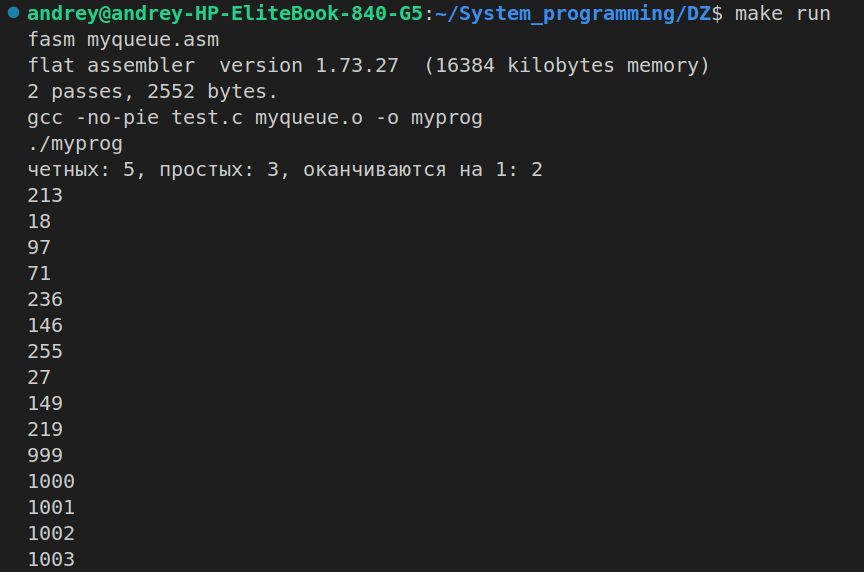